# Predicting Heart Disease using Machine Learning 

This notebook use various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
>Can you predict whether the patient has heart disease or not based on the given clinical parameter.
## 2.Data
The original data came from Cleveland, Hungary, Switzerland, and the VA Long Beach and is available on UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease
## 3.Evaluation 
> If we can reach 95% Accuracy to predict the heart disease.
## 4.Features 
This is where you get different information about each of the feature in your data. 
**Create Data Dictionary** 

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |


# Preparing the Tools 
We're going to use pandas , Matplotlib and Numpy for data analysis and manipulation.

In [7]:
#Import all the tools we need 
#Regular EDA  and plotting libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

#Models from Sci-kit Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score 
from sklearn.metrics import RocCurveDisplay



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Load Data 

In [3]:
df = pd.read_csv("heart-disease.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

## Data Exploration (EDA) 
Become a subject matter expert on the data you're working with.

1. What questions are you trying to solve ?
2. What kind of data do we have , and how do we treat different types?
3. What's missing from the dataset and how you will deal with?
4. Where are the outliers and why should you care about them?
5. How can you add , change or remove features to get more out of your data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
#Lets find out how many classes are there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

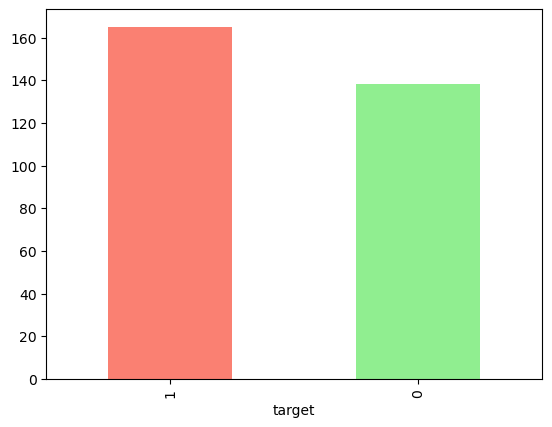

In [19]:
df["target"].value_counts().plot(kind="bar",color = ["salmon" , "lightgreen"]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex 

In [21]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [23]:
#Compare Target Coloumn with Sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


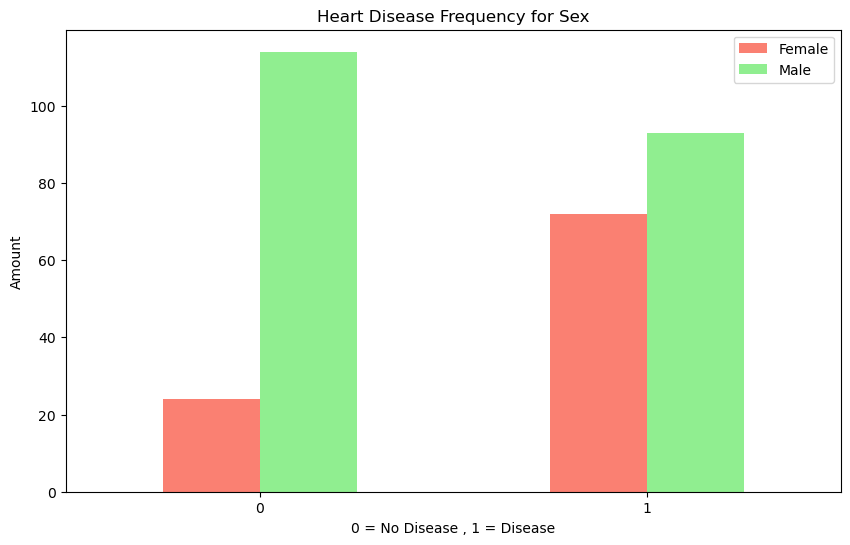

In [27]:
#Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                   color=["salmon","lightgreen"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


In [28]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max heart rate for Heart Disease

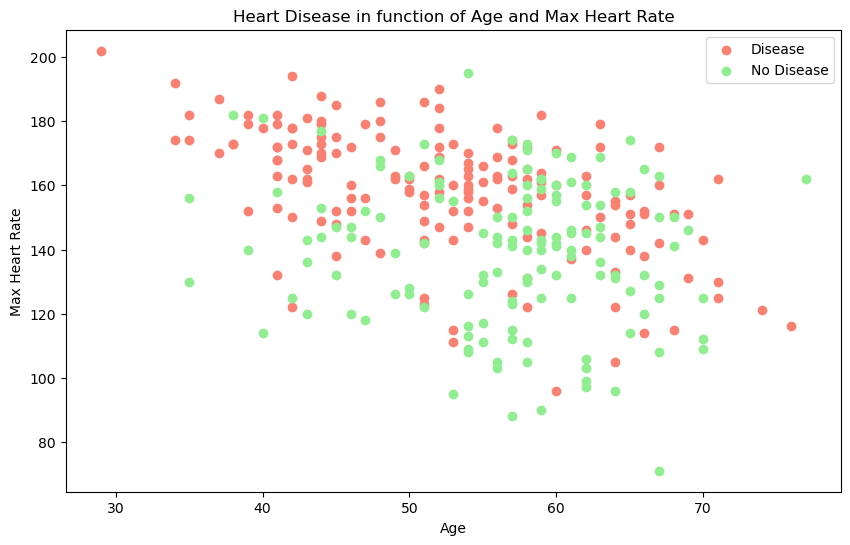

In [40]:
#Create another figure 
plt.figure(figsize=(10,6))
#Scatter with positive examples 
plt.scatter(df.age[df.target==1],
                   df.thalach[df.target==1],
            c="salmon")
#Scatter with negative examples 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightgreen")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [31]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [32]:
df.thalach[df.target==1]

0      150
1      187
2      172
3      178
4      163
      ... 
160    169
161    166
162    182
163    173
164    173
Name: thalach, Length: 165, dtype: int64

<Axes: ylabel='Frequency'>

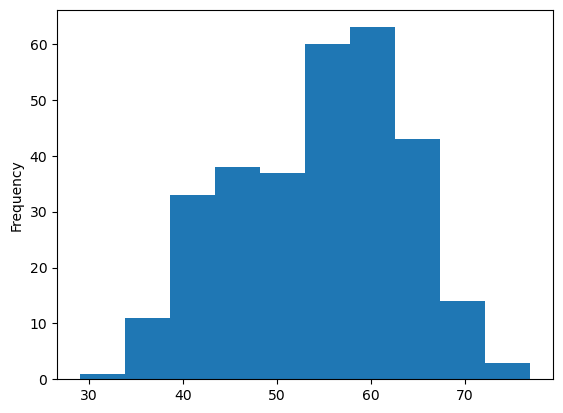

In [43]:
#Check the distribution of the age with the help of Histogram
df.age.plot.hist()

### Heart Disease Frequency  per chest pain type
| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |

In [45]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'Amount')

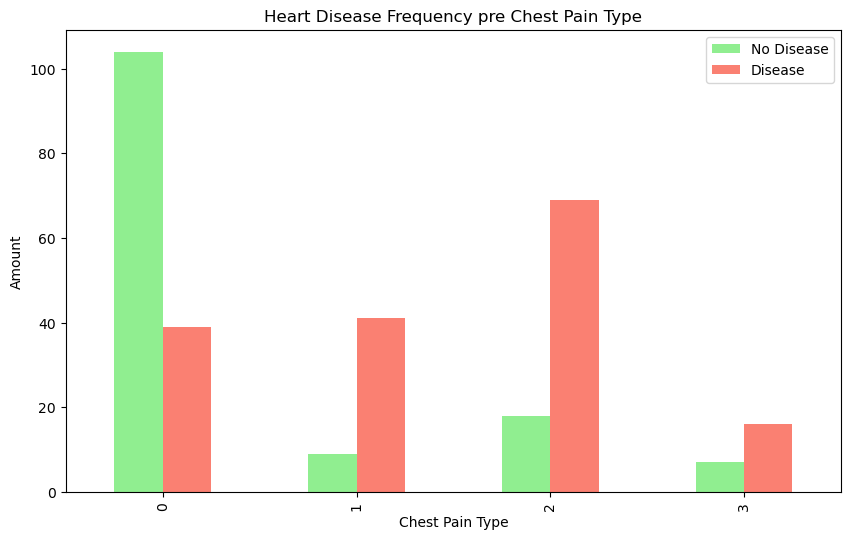

In [55]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightgreen","salmon"])
plt.legend(["No Disease","Disease"])
plt.title("Heart Disease Frequency pre Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")


In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation Matrix 

In [59]:
#Correlation Matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, -0.5)

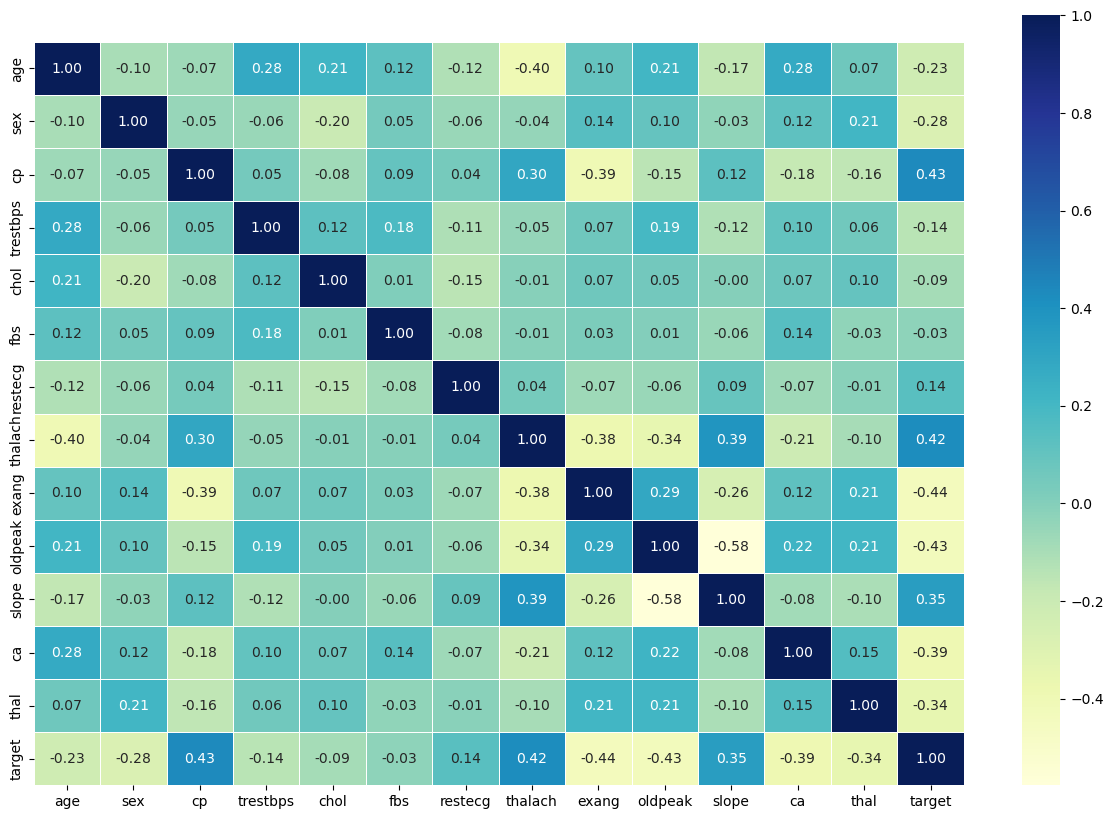

In [67]:
#Let's make it more visually appealing 
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,
                annot = True , 
                linewidths = 0.5,
                fmt = ".2f",
                cmap="YlGnBu");
bottom , top = ax.get_ylim()
ax.set_ylim(bottom,top-0.5)

## 5. Modelling 

In [68]:
#Split the data into X and y 
X = df.drop("target", axis=1)
y = df["target"]

In [69]:
X.shape

(303, 13)

In [70]:
y.shape

(303,)

In [71]:
#Split our data into train and test set 
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2)

In [75]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [77]:
303 * .8

242.4

In [76]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [78]:
303 * .2

60.6

### Now we have got out data split into training and test sets, 
- ### We'll train (find the patterns) on the train set and 
- ### We'll test (use the patterns) on the test set 

### Trying three machine learning models : 
- #### 1 .Logistic Regression
- #### 2. K - Nearest Neighbors
- #### 3. Random Forest Classifier
  

In [79]:
# Put models in a dictionary 
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
#Create a function to fit and score the model 
def fit_and_score(models,X_train, X_test, y_train , y_test):
    """ Fit and evaluate given machine learning models.
        models: a dict of different scikit learn machine learning models 
        X_train : training data (no labels)
        X_test: test (no labels)
        y_train: train labels 
        y_test: test labels
    """
    #set random seed 
    np.random.seed(42)
    #make a dictionary to keep model scores 
    model_scores = {} 
    #Loop through models 
    for name,model in models.items():
        #Fit the model 
        model.fit(X_train,y_train)
        #Evaluate the model and Appends its score to model score 
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [80]:
model_scores = fit_and_score(models=models , 
                             X_train = X_train , 
                             X_test = X_test , 
                             y_train = y_train , 
                             y_test = y_test)
model_scores

/Users/roshanmohammed/Desktop/Github/DataScience/Beginner Scikit-Learn/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

<Axes: >

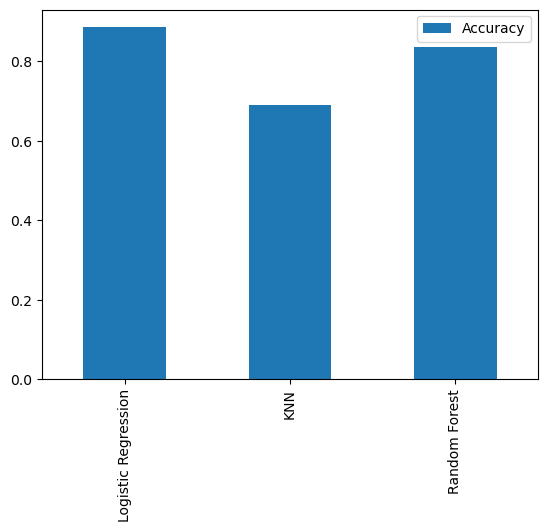

In [82]:
model_compare = pd.DataFrame(model_scores , index = ["Accuracy"])
model_compare.T.plot.bar()
                             

#### After creating a baseline model, we can't always rely on our model's first predictions , What we should do? 
#### Let's look at the following : 
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-Score
* Classification Report
* ROC Curve
* Area under the Curve(AUC)

### Hyperparameter Tuning 

In [84]:
# Lets tune KNN 
train_scores = [] 
test_scores = [] 

# Create a list of different values for n_neighbors 
neighbors = range(1,21)

#Setup KNN instance 
knn = KNeighborsClassifier()

#Loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the Algorithm 
    knn.fit(X_train , y_train)
    #Update the training scores list 
    train_scores.append(knn.score(X_train,y_train))
    #Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [85]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [86]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


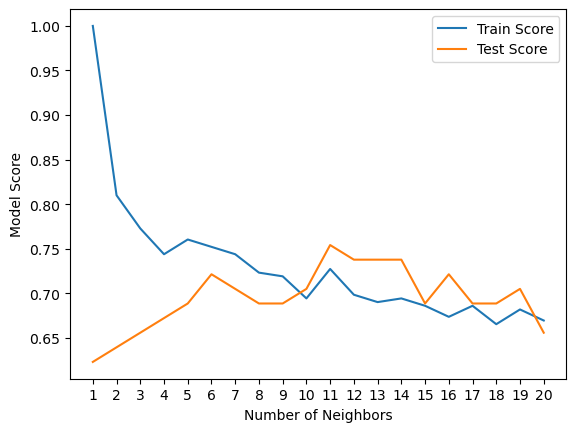

In [89]:
plt.plot(neighbors,train_scores , label = "Train Score")
plt.plot(neighbors , test_scores , label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV 
We're Going to tune: 
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

  
  


In [107]:
#Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
#Create a hyperparameter grid for Random Forest Classifier 
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}



### Now we've setup the grids , let's tune them using RandomizedSearchCV..

In [99]:
#Tune Logistic Regression 
np.random.seed(42)
#Setup random hyperparameter search for logistic Regression 
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [103]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### Now we've tuned LogisticRegression() now let's do the same for RandomForest

In [108]:
#Tune RandomForest
np.random.seed(42)
#Setup random hyperparameter search for RandomForest 
rs_rf_clf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                              param_distributions= rf_grid,
                              n_iter = 20,
                              cv = 3 ,
                              verbose = True)
#Fit the Randomized Search Model for Random Forest 
rs_rf_clf.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [110]:
#Best Parameters 
rs_rf_clf.best_params_

{'n_estimators': np.int64(960),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(13),
 'max_depth': 3}

In [129]:
#Evaluate the Randomized Search RandomForest Classifier Model 
rs_rf_clf.score(X_test,y_test)

0.8688524590163934

### Doing GridSearch for LogisticRegression and RandomForest

In [130]:
#Different Hyperparameter 
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":['liblinear']}
#Setup the grids 
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#Fit the model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [131]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [132]:
#Different Hyperparameter
rf_grid = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]}
#setup the grid 
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid, 
                     cv=3, 
                     verbose=True)
#Fit the model
gs_rf.fit(X_train,y_train)


Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=True)

In [133]:
gs_rf.score(X_test,y_test)

0.8524590163934426

In [134]:
rs_log_reg.score(X_test,y_test),rs_rf_clf.score(X_test,y_test),gs_log_reg.score(X_test,y_test),gs_rf.score(X_test,y_test)

(0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8524590163934426)

#### Evaluating our Classifier after Tuning 
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

It would be Great if cross-validation was used where possible.

First we need to make predictions to make Comparison and evaluate our trained model.


In [135]:
#Make predictions with Tuned model 
y_preds = gs_log_reg.predict(X_test)

In [136]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [139]:
print(y_test)

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64


### ROC Curve

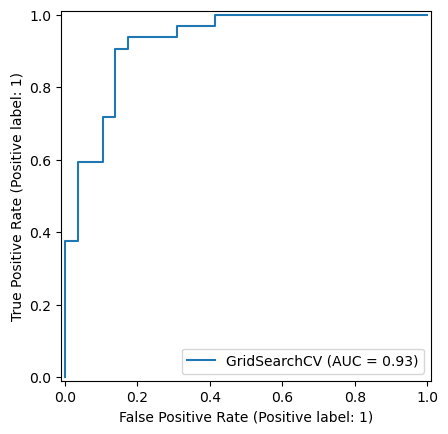

In [146]:
from sklearn.metrics import RocCurveDisplay
#Plot ROC Curve and Calculate AUC metric 
RocCurveDisplay.from_estimator(estimator = gs_log_reg,
                               X = X_test,
                               y= y_test);



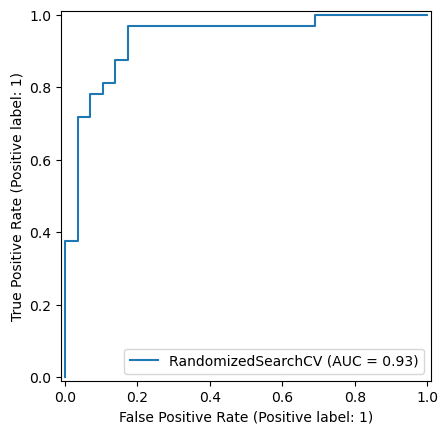

In [147]:
from sklearn.metrics import RocCurveDisplay
#Plot ROC Curve and Calculate AUC metric 
RocCurveDisplay.from_estimator(estimator = rs_rf_clf,
                               X = X_test,
                               y= y_test);

### Confusion Matrix 

In [149]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


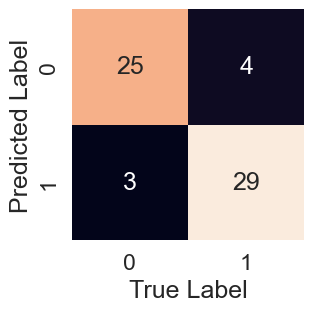

In [157]:
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test,y_preds):
    """ 
        Plots confusion matrix using seaborn heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    #bottom,top = ax.get_ylim()
    #ax.set_ylim(bottom+0.5, top-0.5)
    
plot_conf_mat(y_test,y_preds)

### Now let's create a Classification Report 

In [161]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculating Evaluation Metrics  using Cross Validation , for that we'll be using `cross_val_score()`

In [163]:
#Check best hyper_parameter 
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [165]:
#Create new classifier with best parameters 
clf = LogisticRegression(C =0.20433597178569418,
                        solver="liblinear")

In [176]:
#Cross-validated Accuracy 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [170]:
np.mean(cv_acc)

np.float64(0.8479781420765027)

In [177]:
#Cross-validated Precision 
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [178]:
#Cross-validated Recall 
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [179]:
#Cross-validated F1-Score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

<Axes: title={'center': 'Cross-validated Classification Metrics of Logistic Regression'}>

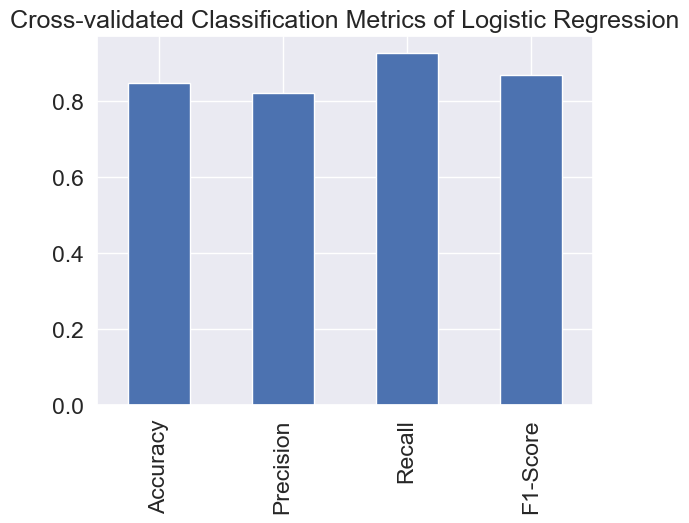

In [183]:
#Visualize Cross-validated Metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1-Score":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics of Logistic Regression",
                     legend=False)

In [184]:
rs_rf_clf.best_params_

{'n_estimators': np.int64(960),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(13),
 'max_depth': 3}

In [186]:
#Create new RandomForest classifier with best parameters 
rf_clf = RandomForestClassifier(n_estimators= 960,
                              min_samples_split=4,
                               min_samples_leaf=13,
                               max_depth=3)

In [187]:
#Cross-validated Accuracy 
rf_cv_acc = cross_val_score(rf_clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
rf_cv_acc=np.mean(rf_cv_acc)
rf_cv_acc

np.float64(0.8382513661202186)

In [188]:
#Cross-validated Precision 
rf_cv_precision = cross_val_score(rf_clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
rf_cv_precision=np.mean(rf_cv_precision)
rf_cv_precision

np.float64(0.8349525662025663)

In [189]:
#Cross-validated Recall 
rf_cv_recall = cross_val_score(rf_clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
rf_cv_recall=np.mean(rf_cv_recall)
rf_cv_recall

np.float64(0.9030303030303031)

In [191]:
#Cross-validated F1 Score 
rf_cv_f1 = cross_val_score(rf_clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
rf_cv_f1=np.mean(rf_cv_f1)
rf_cv_f1

np.float64(0.8541955218334193)

<Axes: title={'center': 'Cross-validated Classification Metrics of Random Forest Classifier'}>

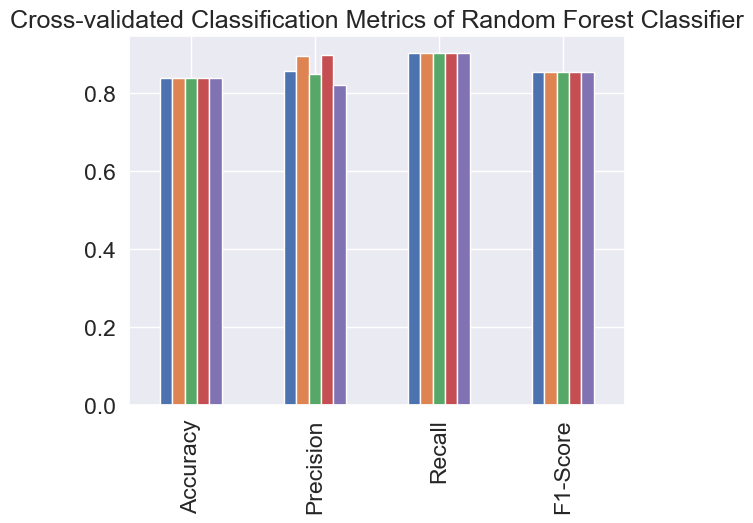

In [195]:
#Visualize Cross-validated Metrics 
cv_metrics = pd.DataFrame({"Accuracy":rf_cv_acc,
                          "Precision":rf_cv_precision,
                          "Recall":rf_cv_recall,
                          "F1-Score":rf_cv_f1})
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics of Random Forest Classifier",
                     legend=False)

### Feature Importance :
- To find the most important features , which contribute to the outcomes of the model and how did they contribute?
- Finding Feature Importance is different for each machine learning model.

#### Let's find the Feature Importance for our machine learning models 

In [196]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [199]:
#Fit an instance of Logistic Regresssion 
clf = LogisticRegression(C =0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [200]:
#Check Coefficient
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [201]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict 

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

<Axes: title={'center': 'Feature Importance'}>

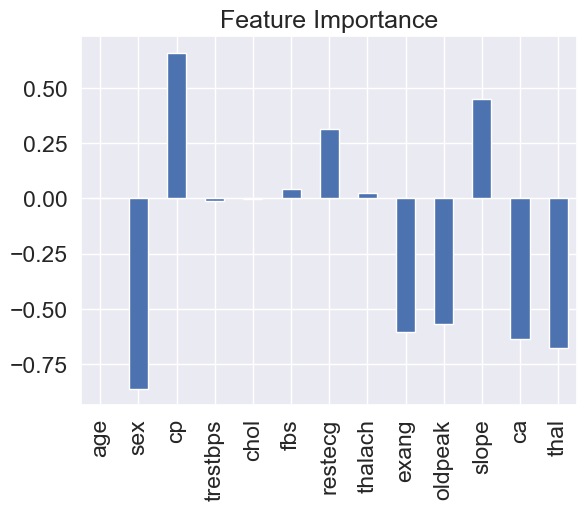

In [204]:
#Visualise Feature Importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [205]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [206]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


 **slope** The slope of the peak exercise ST segment 
 - 0: Upsloping :Better Heart Rate with excercise(uncommon)
 - 1: Flatsloping(typical healthy heart
 - 2: Downsloping: signs of unhealthy heart